<a href="https://colab.research.google.com/github/brunodleite/DataScience_RealProjects/blob/main/sydney_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados dos imóveis da cidade de Sydney na Austrália: 2000-2019



<center><img alt="Real Estate" width="10%" src="https://media-exp1.licdn.com/dms/image/C4D0BAQGXit3uM4HaqQ/company-logo_200_200/0/1519864177071?e=2159024400&v=beta&t=71SrmUOHSGXRsdG8pD01jSL27Mz7VJLv6wi3Wemyt1M"></center>

### Descrição: O site [Real Estate](https://www.realestate.com.au/buy) é um dos maiores sites imobiliário da Austrália, onde é possível encontrar imóveis para compra/venda e notícias/dados relacionadas ao mercado imobiliário.

### O site possui uma média com mais de 8 milhões de acessos por mês. Nele é possível encontrar casas compartilhadas, divulgar propriedades para alugar, entre outros. 

### O [Real Estate](https://www.realestate.com.au/buy) pertence ao Grupo REA e foi fundada em 1995, cuja sede encontra-se em Melbourne, Austrália.

#### O conjunto de dados estão disponíveis na plataforma [Kaggle](https://www.kaggle.com/mihirhalai/sydney-house-prices).

<img alt="Sydney" width="80%" src="https://positivoturismo.com.br/wp-content/uploads/2018/04/img_597f7cbb51ad7.png"></center>

### Fontes: 


*   [Real Estate](https://www.realestate.com.au/buy)
*   [Kaggle](https://www.kaggle.com/mihirhalai/sydney-house-prices)


## Importando bibliotecas

In [2]:
# Import das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
%matplotlib inline

## Obtenção dos Dados

Os dados utilizados neste projeto foram obtidos do site [Kaggle](https://www.kaggle.com/mihirhalai/sydney-house-prices), com dados imobiliários da cidade de Sydney de 2000 a 2019.

Para a análise inicial, foi realizado o download do seguinte arquivo:


*   `sydney_house_prices.zip`

In [56]:
url = 'https://github.com/brunodleite/DataScience_RealProjects/blob/main/sydney_house_prices/sydney_house_prices.zip?raw=true' 
df = pd.read_csv(url, compression= 'zip')

## Análise dos Dados

**Dicionário das variáveis**

* `Date` - Data que a propriedade foi anunciada
* `Id` -  Número identificador da propriedade
* `suburb` - Subúrbio (bairro) onde a propriedade está localizada
* `postalCode` - Código postal onde a propriedade está localizada
* `SellPrice` - Valor de venda 
* `bed` - Número de quartos
* `bath` - Número de banheiros
* `car` - Tamanho da garagem 
* `propType` - Tipo de propriedade

Antes de iniciar qualquer análise, vamos verificar as extremidades do nosso *dataset*, uma visualização inicial de como os dados estão dispostos.

In [57]:
# Verificando as primeiras 5 entradas
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [5]:
# Verificando as ultimas 5 entradas
df.tail()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse
199503,2011-04-16,199504,Alfords Point,2234,1611000,5.0,4,3.0,house


In [6]:
# Verificando uma amostra aleatória com 5 entradas
df.sample(5)

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
131080,2019-07-05,131081,Edmondson Park,2174,775000,4.0,2,2.0,house
80002,2016-05-17,80003,North Parramatta,2151,840000,2.0,1,2.0,house
105387,2013-04-05,105388,Concord West,2138,1160000,4.0,2,1.0,house
146128,2013-12-14,146129,North Narrabeen,2101,810000,3.0,1,2.0,house
128820,2017-03-29,128821,Guildford,2161,990000,5.0,2,2.0,house


Com o intuito de deixar a análise de dados mais didática, foram realizados algumas perguntas aos dados para uma melhor extração de informações valiosas

### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Nosso dataframe é composto por **9 variáveis** e **199504 entradas**. As variáveis são dos seguintes tipos: **int64, object** e **float64**.

In [7]:
# identificação do volume de dados do DataFrame
print("Qtd de atributos: \t {}".format(df.shape[1]))
print("Qtd de entradas:\t {}\n".format(df.shape[0]))

# verificação dos tipos de variáveis que compõe o dataframe
display(df.dtypes)

Qtd de atributos: 	 9
Qtd de entradas:	 199504



Date           object
Id              int64
suburb         object
postalCode      int64
sellPrice       int64
bed           float64
bath            int64
car           float64
propType       object
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**
Podemos verificar que as variáveis `car` e `bed` possuem alguns valores ausentes. Sendo 9% de valores ausentes correspondendo à variável `car` e 0,08% de valores ausentes correspondendo à variável `bed`.

In [8]:
# ordenando em ordem decrescente as variáveis através dos seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

car           0.090981
bed           0.000772
propType      0.000000
bath          0.000000
sellPrice     0.000000
postalCode    0.000000
suburb        0.000000
Id            0.000000
Date          0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 
É importante realizar o plot das distribuições dos atributos do dataset, para que seja possível verificar se há discrepância em alguns atributos. Como exemplo, de cara podemos verificar que as variáveis `sellPrice`, `bed`, `bath`, `car` que vamos trabalhar nesse projeto possuem valores discrepantes (outliers).


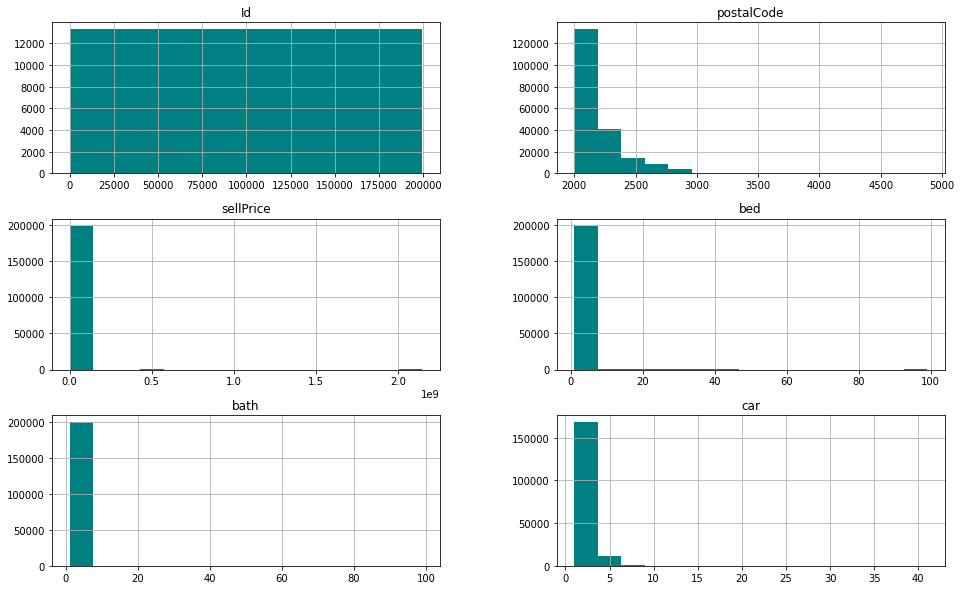

In [9]:
df.hist(bins=15, figsize=(16,10), color='teal');

### **Existe a presença de *outliers* em nosso dataset?**

A partir da análise gráfica acima, verificamos as variáveis que vamos trabalhar não seguem uma distribuição, vamos confirmar a partir de uma análise descritiva.

In [10]:
# Estatística descritiva das variáveis numericas
df[['sellPrice', 'bed', 'bath', 'car']].describe()

,sellPrice,bed,bath,car
count,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,1.269776e+06,3.516479,1.890669,1.936224
std,6.948239e+06,1.066555,0.926001,1.060237
min,1.000000e+00,1.000000,1.000000,1.000000
25%,7.200000e+05,3.000000,1.000000,1.000000
50%,9.850000e+05,3.000000,2.000000,2.000000
75%,1.475000e+06,4.000000,2.000000,2.000000
max,2.147484e+09,99.000000,99.000000,41.000000


Partindo do resumo estatístico acima, podemos verificar que existem outliers, focando no terceiro quartil e no valor máx:


*   a variável `sellPrice` possui uma média de AUD 1.269.776 (dólares australianos), com 75% dos valores abaixo de AUD 1.475.000. O valor máximo corresponde a um valor extremamente alto.

*   a variável `bed` possui uma média de 3.51, com 75% dos valores abaixo de 4 nº de quartos. O valor máximo corresponde a 99.

*   a variável `bath` possui uma média de 1.89 , com 75% dos valores abaixo de 2 nº de banheiros. O valor máximo corresponde a 99.

*   a variável `car` possui uma média de 1.93 , com 75% dos valores abaixo de 2 nº de carros. O valor máximo corresponde a 41.

**Boxplot da variável sellPrice**  

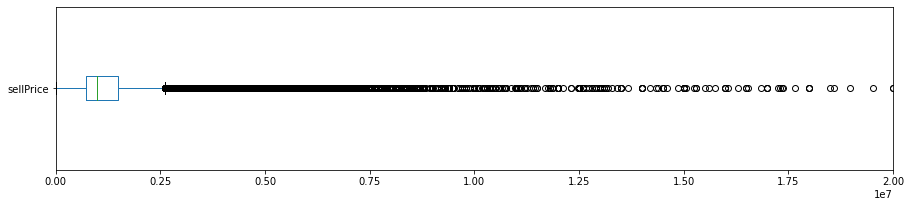


sellPrice: valores acima de 0.25 e+07 (2.5 milhões)
12941 entradas
6.4866%


In [11]:
# boxplot sellPrice
df.sellPrice.plot.box( vert=False, figsize=(15,3))
plt.xlim(0,2*10**7)
plt.show()

# verificar quantidade de valores acima de 12,5 1e7 para a variável sellPrice
valor = 0.25*10**7
print("\nsellPrice: valores acima de 0.25 e+07 (2.5 milhões)")
print("{} entradas".format(len(df[df.sellPrice > valor])))
print("{:.4f}%".format((len(df[df.sellPrice >  valor]) / df.shape[0])*100))

Podemos verificar que acima de **2.5 milhões de dólares australianos** há muitos valores discrepantes, que correspondem a **6.48%** das nossas entradas da variável **sellPrice**

**Boxplot da variável bed**  

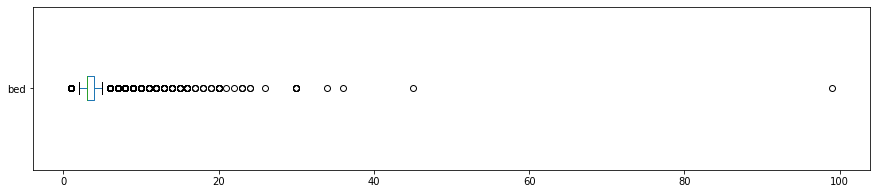


bed: valores acima de 6 quartos
1328 entradas
0.6657%


In [12]:
# boxplot bed
df.bed.plot.box( vert=False, figsize=(15,3))
plt.show()

# verificar quantidade de valores acima de 6 quartos da variável bed
valor = 6
print("\nbed: valores acima de 6 quartos")
print("{} entradas".format(len(df[df.bed > valor])))
print("{:.4f}%".format((len(df[df.bed >  valor]) / df.shape[0])*100))

Podemos verificar que acima de **6 quartos** há alguns valores discrepantes, que correspondem a **0,66%** das nossas entradas da variável **bed**

**Boxplot da variável bath**  

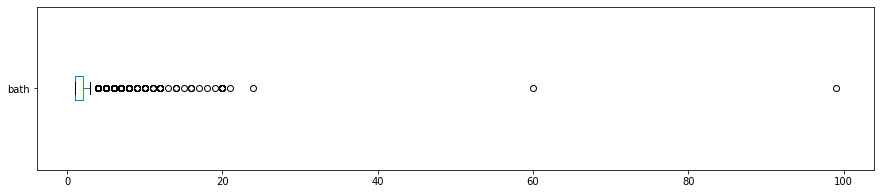


bath: valores acima de 4 banheiros
2008 entradas
1.0065%


In [13]:
# boxplot bath
df.bath.plot.box( vert=False, figsize=(15,3))
plt.show()

# verificar quantidade de valores acima de 4 banheiros da variável bath
valor = 4
print("\nbath: valores acima de 4 banheiros")
print("{} entradas".format(len(df[df.bath > valor])))
print("{:.4f}%".format((len(df[df.bath >  valor]) / df.shape[0])*100))

Podemos verificar que acima de **4 banheiros** há alguns valores discrepantes, que correspondem a **1,00%** das nossas entradas da variável **bath**

**Boxplot da variável car**  

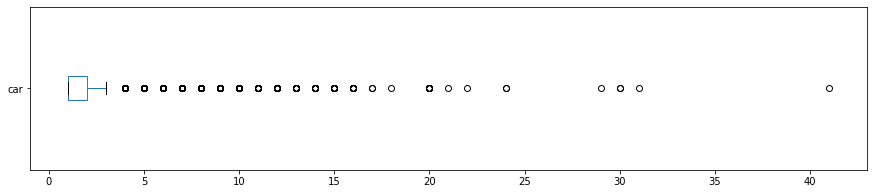


car: valores acima de 4 carros
3941 entradas
1.9754%


In [14]:
# boxplot car
df.car.plot.box( vert=False, figsize=(15,3))
plt.show()

# verificar quantidade de valores acima de 4 carros da variável car
valor = 4
print("\ncar: valores acima de 4 carros")
print("{} entradas".format(len(df[df.car > valor])))
print("{:.4f}%".format((len(df[df.car >  valor]) / df.shape[0])*100))

Podemos verificar que acima de **4 carros** há alguns valores discrepantes, que correspondem a **1,97%** das nossas entradas da variável **car**

Após realizar o tratamento dos outliers, foi plotado novamente o histograma para verificar a distribuição das variáveis.

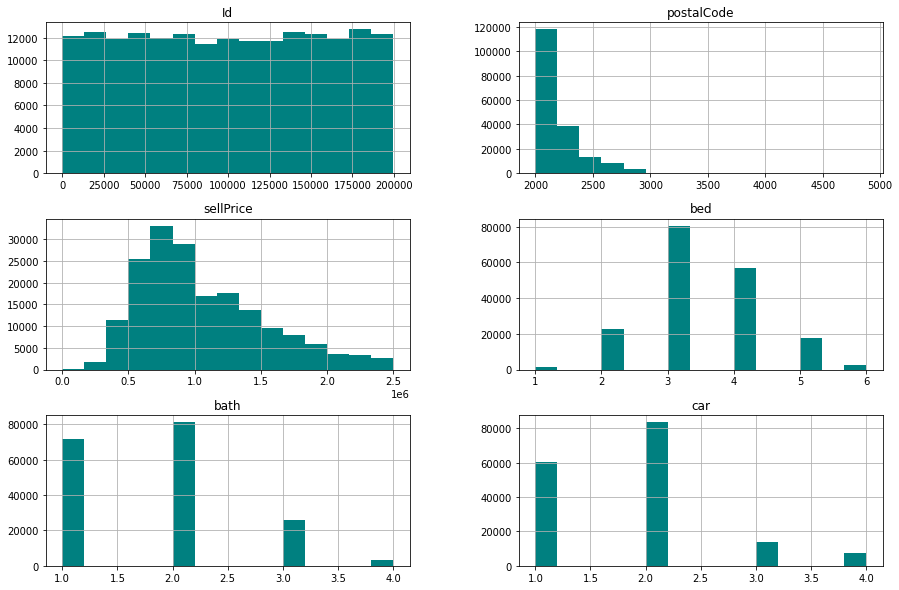

In [15]:
valor1 = 0.25*10**7
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.sellPrice > valor1].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.bed > 6].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.bath > 4].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.car > 4].index, axis=0, inplace=True)

#plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color='teal');

É possível observar que na variável `sellPrice` a maior parte dos preços se localizam no intervalo entre AUD 500.000,00 a AUD 1.500.000,00. 

Com os dados relativamente ajustados é possível extrair melhor as informações valiosas.

### **Qual a média dos preços dos imóveis?**

In [16]:
# verificar média de preço da coluna sellPrice
media = df_clean['sellPrice'].mean()
print('Média de preço em Dólares Australianos (AUD): {}'.format(round(media,2)))

Média de preço em Dólares Australianos (AUD): 1061779.52


A média dos preços da propriedades corresponde a AUD 1.061.779,52

### Qual o comportamento dos preços no decorrer dos anos?

Primeiro foi necessário realizar alguns ajustes para realizar o plot do gráfico temporal.

In [49]:
# Separando o ano da data completa e criando uma nova coluna apenas com a variável ano
date = df_clean['Date']

ano = [a.split('-')[0] for a in date]
df_clean['Year'] = ano

In [50]:
df_clean.sample(5)

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,Year
21960,2017-06-16,21961,Marrickville,2204,1775000,5.0,1,NaN,house,2017
19879,2015-09-12,19880,Beacon Hill,2100,1750000,3.0,1,1.0,house,2015
132914,2014-08-01,132915,Haberfield,2045,1560000,3.0,1,2.0,house,2014
154268,2014-12-12,154269,Yagoona,2199,590000,2.0,1,1.0,house,2014
195805,2015-05-13,195806,Balgowlah,2093,1425000,3.0,2,2.0,house,2015


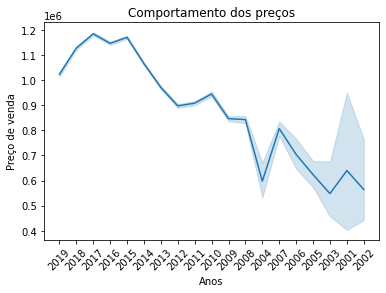

In [54]:
sns.lineplot(data=df_clean, x ='Year',y ='sellPrice')
plt.title ("Comportamento dos preços") 
plt.xlabel ("Anos") 
plt.ylabel ("Preço de venda")
plt.xticks(rotation=45)
plt.show()

No gráfico acima podemos verificar o comportamento dos preços de venda no decorrer dos anos. Fica claro que a tendência do preço desde de 2001 a 2019 foi sempre crescente.

### **Qual o tipo de imóvel mais frequente na cidade de Sydney ?**

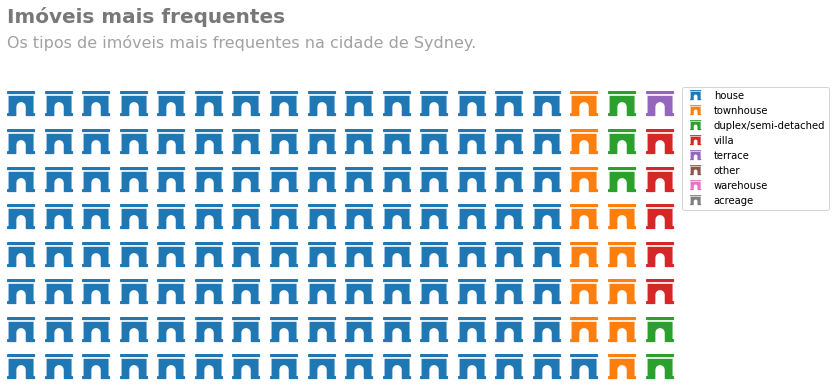

house                   0.840948
townhouse               0.082745
duplex/semi-detached    0.036321
villa                   0.031295
terrace                 0.006674
other                   0.001818
warehouse               0.000176
acreage                 0.000022
Name: propType, dtype: float64


In [20]:
data = dict(df_clean['propType'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12,8),
    rows=8,
    columns=18,
    cmap_name=("tab10"),
    values=data, icons='archway', icon_size=25,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

plt.text(0, 1.2, 'Imóveis mais frequentes',
         fontsize=20,
         color="#787878",
         weight='bold')

plt.text(0, 1.16,
         "Os tipos de imóveis mais frequentes na cidade de Sydney.",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

fig.set_tight_layout(False)
plt.show();
print((df_clean['propType'].value_counts() / df_clean.shape[0]))

É possível observar que o tipo de imóvel mais recorrente na cidade de Sydney é **casa** com **84%** das entradas. O segundo tipo é **Townhouse**, uma construção característica do país, parecido com **sobrados** no Brasil, corresponde a **8,27%** do conjunto de dados deste tipo.

### **Qual a localidade mais cara?**

**Bairros mais caros**

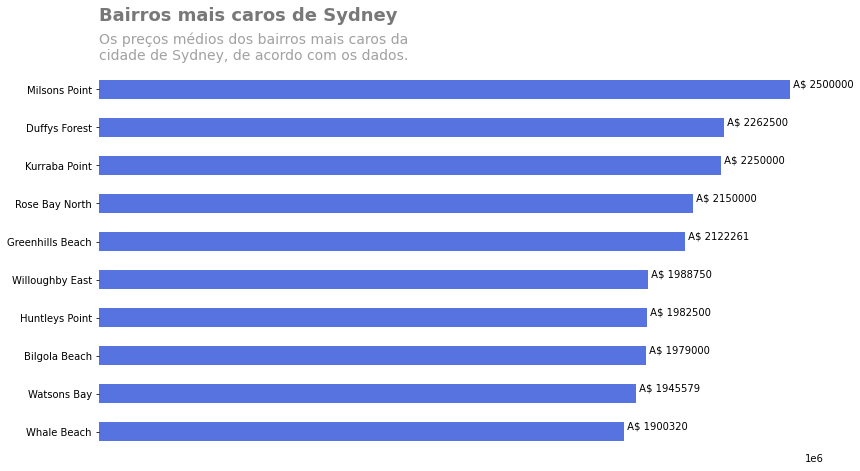

In [21]:
#Definindo cores
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"

# plotando o gráfico
fig, ax = plt.subplots(figsize= (13,7))
n_plots = 10
palette = sns.color_palette("coolwarm", n_colors=n_plots)

with palette:
  # ver preços por bairros, na média
  ax = df_clean.groupby(['suburb'])['sellPrice'].mean().sort_values(ascending=True)[670:].plot.barh()

  # plotar título
  plt.text(-2, 10.8, 'Bairros mais caros de Sydney',
          fontsize=18, 
          color=CINZA3,
          weight='bold')

  # plotar subtitulo
  plt.text(-0.35, 10.5,
          "Os preços médios dos bairros mais caros da\n"
          "cidade de Sydney, de acordo com os dados.",
          verticalalignment="top",
          fontsize=14,
          color=CINZA2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,' A$ {:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

Os 3 bairros que possuem as propriedades mais cara da cidade de Sydney são: *Milsons Point* com valor médio de AUD 2.500.000,00 | , *Duffys Forest* com valor médio de AUD 2.262.500,00 | *Kurraba Point* com valor médio de AUD 2.250.000, com base nos dados do dataset.

**Bairros mais baratos**

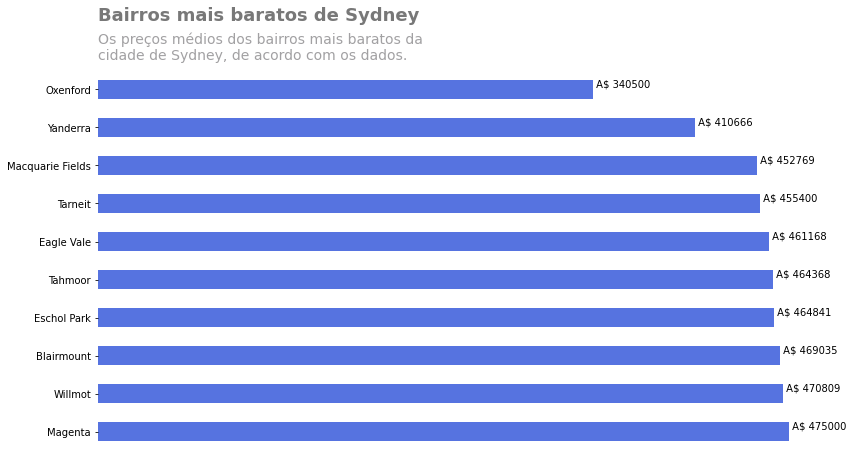

In [22]:
#Definindo cores
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"

# plotando o gráfico
fig, ax = plt.subplots(figsize= (13,7))
n_plots = 10
palette = sns.color_palette("coolwarm", n_colors=n_plots)

with palette:
  # ver preços por bairros, na média
  ax = df_clean.groupby(['suburb'])['sellPrice'].mean().sort_values(ascending=False)[670:].plot(kind='barh')

  # plotar título
  plt.text(-2, 10.8, 'Bairros mais baratos de Sydney',
          fontsize=18, 
          color=CINZA3,
          weight='bold')

  # plotar subtitulo
  plt.text(-0.35, 10.5,
          "Os preços médios dos bairros mais baratos da\n"
          "cidade de Sydney, de acordo com os dados.",
          verticalalignment="top",
          fontsize=14,
          color=CINZA2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,' A$ {:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

Os 3 bairros que possuem as propriedades mais barata da cidade de Sydney são: *Oxenford* com valor médio de AUD 340.500,00 | , *Yanderra* com valor médio de AUD 410.666,00 | *Macquarie* com valor médio de AUD 452.769,00, com base nos dados do dataset.

### **Qual a correlação existente entre as variáveis?**

In [23]:
# criar uma matriz de correlação
corr = df_clean[['sellPrice', 'bed', 'bath', 'car']].corr()

display(corr)   

,sellPrice,bed,bath,car
sellPrice,1.000000,0.302380,0.355501,0.187877
bed,0.302380,1.000000,0.624338,0.319499
bath,0.355501,0.624338,1.000000,0.287942
car,0.187877,0.319499,0.287942,1.000000


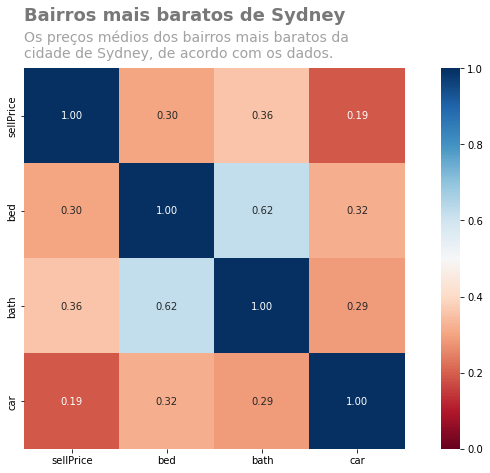

In [24]:
# plotar um heatmap a partir das correlações
fig, ax = plt.subplots(figsize= (13,7))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, vmin=0, vmax=1);


# plotar título
plt.text(0,-0.5, 'Bairros mais baratos de Sydney',
        fontsize=18, 
        color=CINZA3,
        weight='bold')

# plotar subtitulo
plt.text(0.0, -0.4,
        "Os preços médios dos bairros mais baratos da\n"
        "cidade de Sydney, de acordo com os dados.",
        verticalalignment="top",
        fontsize=14,
        color=CINZA2);

O principal insight que podemos extrair é a correlação da variável `sellPrice` (variável dependente) em relação às variáveis `bed`, `bath` e `car` (variáveis explicativas).

Pontos importantes:


*   Podemos verificar um correlação positiva entre todas as variáveis explicativas;
*   **sellPrice e bed**: A tendência é que o preço do imóvel seja maior quando há um número maior de quartos;
*   **sellPrice e bath**: também existe a tendência que o preço do imóvel seja maior quando há um número maior de banheiros, sendo que essa variável (bath) tem uma correlação mais fortes do que as outras duas (bed e car);
*   **sellPrice e car**: existe uma tendência que o preço do imóvel seja maior quanto maior for o espaço da garagem, mesmo sendo uma correlação menor do que as outras variáveis.



### **Conclusão**

Portanto, pode-se concluir que realizar uma análise de dados é de extrema importância quando se trata de escolher o imóvel para comprar/vender/alugar, pois contribui para o cliente ficar por dentro dos preços que a localização/bairro estão oferecendo. 

A limpeza dos dados é extrema importância pois foi possível verificar que em algumas localidades existem propriedades com uma alto valor de venda, que não compõem a maioria dos dados, que poderia distorcer a nossa análise de dados.